In [1]:
import pandas as pd

dataset = pd.read_csv('Datasets/chirps.csv')
dataset.sample(5)

,Date,Time,Chirps_15s,Temp_C
1,21-Aug,2100,46.40,25.833
10,25-Aug,500,12.50,12.778
42,6-Sep,600,23.66,16.111
16,26-Aug,2030,43.00,25.278
34,30-Aug,2055,37.00,22.917


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        55 non-null     object 
 1   Time        55 non-null     int64  
 2   Chirps_15s  55 non-null     float64
 3   Temp_C      55 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [3]:
import statsmodels.api as sm

X = sm.add_constant(dataset['Chirps_15s'])
y = dataset['Temp_C']

X.sample(2)

,const,Chirps_15s
8,1.0,25.50
42,1.0,23.66


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [5]:
regressor_OLS = sm.OLS(y_train, X_train).fit()

regressor_OLS.params

const         4.332386
Chirps_15s    0.496449
dtype: float64

In [6]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Temp_C   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     989.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.03e-31
Time:                        21:10:54   Log-Likelihood:                -57.160
No. Observations:                  44   AIC:                             118.3
Df Residuals:                      42   BIC:                             121.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3324      0.478      9.061      0.000       3.367       5.297
Chirps_15s     0.4964      0.016     31.451      0.000       0.465       0.528
==============================================================================
Omnibus:                        2.599   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.562
Skew:                          -0.360   Prob(JB):                        0.458
Kurtosis:                       3.577   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 576x432 with 0 Axes>

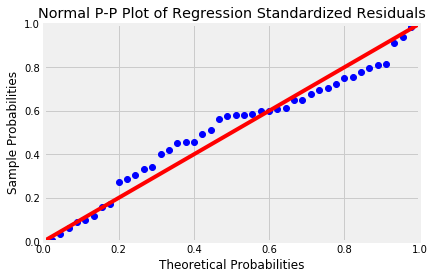

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

regressor_OLS_resid = regressor_OLS.resid
probplot = sm.ProbPlot(regressor_OLS_resid)
plt.figure(figsize = (8, 6))
probplot.ppplot(line = '45')
plt.title ('Normal P-P Plot of Regression Standardized Residuals')
plt.show()

In [8]:
from scipy.stats import zscore

dataset['zscore'] = zscore(y)

dataset[(dataset['zscore'] > 3) | (dataset['zscore'] < -3)]

,Date,Time,Chirps_15s,Temp_C,zscore


In [9]:
y_pred = regressor_OLS.predict(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

np.abs(r2_score(y_test, y_pred))

0.9645660015990598

In [14]:
np.abs(mean_squared_error(y_test, y_pred))

0.7540405047146911